In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, roc_curve, precision_recall_curve, confusion_matrix, f1_score, average_precision_score, cohen_kappa_score
from inspect import signature
from sklearn.externals import joblib
from sklearn.metrics import classification_report

C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# 1. Prepare Data

In [2]:
OOB_12 = pd.read_csv("../5. Modeling - Random Forest/Random Forest (AllFeatures - OOB - 12).csv", index_col=0)
OOB_12.shape

(12, 1)

In [3]:
X_train_resampled = pd.read_csv("../3. Data Preparation/X_train_resampled.csv", index_col=0)
X_train_resampled.shape

(1848, 30)

In [4]:
y_train_resampled = pd.read_csv("../3. Data Preparation/y_train_resampled.csv", index_col=0)
y_train_resampled.shape

(1848, 1)

In [5]:
X_val = pd.read_csv("../3. Data Preparation/X_val.csv", index_col=0)
X_val.shape

(56962, 30)

In [6]:
y_val = pd.read_csv("../3. Data Preparation/y_val.csv", index_col=0, header=0)
y_val.shape

(56962, 1)

In [7]:
target_names=['Not Fraud 0', 'Fraud 1']

In [8]:
dim=100

# 2. Grid Search 

In [8]:
#n_estimators_list = [21, 27, 31, 35, 41, 51, 71, 91, 101, 131, 155, 161, 165, 191, 201]
n_estimators_list = [21, 27, 31, 35, 41, 47, 51]

avg_per_estimator = []

for n_estimators in n_estimators_list:
    
    avg = []
    for i in range(0, dim):
        clf = RandomForestClassifier(n_estimators=n_estimators, 
                                     random_state=0, n_jobs=-1, 
                                     verbose=False, oob_score=True)
        oob_score = clf.fit(X_train_resampled[OOB_12.index.values].copy(), y_train_resampled['Class'].values)
        print(n_estimators, i, oob_score.oob_score_)
        avg.append(oob_score.oob_score_)
        
    avg_per_estimator.append(np.mean(avg))

21 0 0.9718614718614719
21 1 0.9718614718614719
21 2 0.9718614718614719
21 3 0.9718614718614719
21 4 0.9718614718614719
21 5 0.9718614718614719
21 6 0.9718614718614719
21 7 0.9718614718614719
21 8 0.9718614718614719
21 9 0.9718614718614719
21 10 0.9718614718614719
21 11 0.9718614718614719
21 12 0.9718614718614719
21 13 0.9718614718614719
21 14 0.9718614718614719
21 15 0.9718614718614719
21 16 0.9718614718614719
21 17 0.9718614718614719
21 18 0.9718614718614719
21 19 0.9718614718614719
21 20 0.9718614718614719
21 21 0.9718614718614719
21 22 0.9718614718614719
21 23 0.9718614718614719
21 24 0.9718614718614719
21 25 0.9718614718614719
21 26 0.9718614718614719
21 27 0.9718614718614719
21 28 0.9718614718614719
21 29 0.9718614718614719
21 30 0.9718614718614719
21 31 0.9718614718614719
21 32 0.9718614718614719
21 33 0.9718614718614719
21 34 0.9718614718614719
21 35 0.9718614718614719
21 36 0.9718614718614719
21 37 0.9718614718614719
21 38 0.9718614718614719
21 39 0.9718614718614719
21 40 0.97

35 35 0.9751082251082251
35 36 0.9751082251082251
35 37 0.9751082251082251
35 38 0.9751082251082251
35 39 0.9751082251082251
35 40 0.9751082251082251
35 41 0.9751082251082251
35 42 0.9751082251082251
35 43 0.9751082251082251
35 44 0.9751082251082251
35 45 0.9751082251082251
35 46 0.9751082251082251
35 47 0.9751082251082251
35 48 0.9751082251082251
35 49 0.9751082251082251
35 50 0.9751082251082251
35 51 0.9751082251082251
35 52 0.9751082251082251
35 53 0.9751082251082251
35 54 0.9751082251082251
35 55 0.9751082251082251
35 56 0.9751082251082251
35 57 0.9751082251082251
35 58 0.9751082251082251
35 59 0.9751082251082251
35 60 0.9751082251082251
35 61 0.9751082251082251
35 62 0.9751082251082251
35 63 0.9751082251082251
35 64 0.9751082251082251
35 65 0.9751082251082251
35 66 0.9751082251082251
35 67 0.9751082251082251
35 68 0.9751082251082251
35 69 0.9751082251082251
35 70 0.9751082251082251
35 71 0.9751082251082251
35 72 0.9751082251082251
35 73 0.9751082251082251
35 74 0.9751082251082251


51 64 0.9751082251082251
51 65 0.9751082251082251
51 66 0.9751082251082251
51 67 0.9751082251082251
51 68 0.9751082251082251
51 69 0.9751082251082251
51 70 0.9751082251082251
51 71 0.9751082251082251
51 72 0.9751082251082251
51 73 0.9751082251082251
51 74 0.9751082251082251
51 75 0.9751082251082251
51 76 0.9751082251082251
51 77 0.9751082251082251
51 78 0.9751082251082251
51 79 0.9751082251082251
51 80 0.9751082251082251
51 81 0.9751082251082251
51 82 0.9751082251082251
51 83 0.9751082251082251
51 84 0.9751082251082251
51 85 0.9751082251082251
51 86 0.9751082251082251
51 87 0.9751082251082251
51 88 0.9751082251082251
51 89 0.9751082251082251
51 90 0.9751082251082251
51 91 0.9751082251082251
51 92 0.9751082251082251
51 93 0.9751082251082251
51 94 0.9751082251082251
51 95 0.9751082251082251
51 96 0.9751082251082251
51 97 0.9751082251082251
51 98 0.9751082251082251
51 99 0.9751082251082251


In [10]:
avg_per_estimator

[0.9718614718614718,
 0.9745670995670995,
 0.9740259740259741,
 0.9751082251082255,
 0.9751082251082255,
 0.9745670995670995,
 0.9751082251082255]

In [11]:
final_n_estimator = n_estimators_list[avg_per_estimator.index(max(avg_per_estimator))]
print("n_est", final_n_estimator, "OOB",max(avg_per_estimator))

n_est 35 OOB 0.9751082251082255


# 3. Random Forest classifier with n=35

In [12]:
clf = RandomForestClassifier(n_estimators=35, #final_n_estimator, 
                                     random_state=0, n_jobs=25, 
                                     verbose=False, oob_score=True)
oob_score = clf.fit(X_train_resampled[OOB_12.index.values].copy(), y_train_resampled['Class'].values)
print(oob_score.oob_score_)

0.9751082251082251


In [14]:

y_pred_val = clf.predict(X_val[OOB_12.index.values].copy())

In [15]:
x = pd.DataFrame
x = y_pred_val

In [16]:
from collections import Counter
print(sorted(Counter(y_pred_val).items()))

[(0, 56615), (1, 347)]


# 4. Confusion Matrix


In [18]:
from sklearn.metrics import confusion_matrix

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


np.set_printoptions(precision=2)


Confusion matrix, without normalization
[[56604   261]
 [   11    86]]


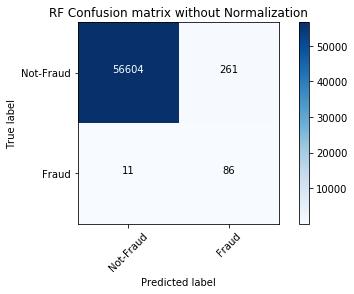

Normalized confusion matrix
[[1.   0.  ]
 [0.11 0.89]]


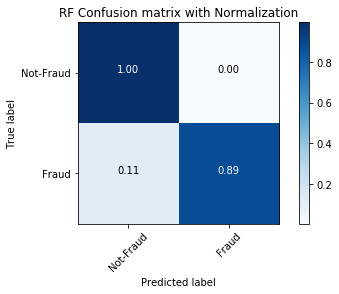

In [19]:
cm = confusion_matrix(y_val['Class'].values, y_pred_val)

class_names = ['Not-Fraud','Fraud']
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names , 
                      title = 'RF Confusion matrix without Normalization')
plt.show()

plot_confusion_matrix(cm, 
                      classes = class_names , 
                      normalize = True,
                      title = 'RF Confusion matrix with Normalization')
plt.show()


# 5. Metrics Results

In [20]:
print(classification_report(y_val['Class'].values, y_pred_val, target_names=target_names))

              precision    recall  f1-score   support

 Not Fraud 0       1.00      1.00      1.00     56865
     Fraud 1       0.25      0.89      0.39        97

    accuracy                           1.00     56962
   macro avg       0.62      0.94      0.69     56962
weighted avg       1.00      1.00      1.00     56962



# Sensitivity and Specificity 

In [21]:
total1=sum(sum(cm))


sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

Sensitivity :  0.9954101820100237
Specificity :  0.8865979381443299


# Metrics

In [22]:

acc= accuracy_score( y_val['Class'].values, y_pred_val)
recall = recall_score( y_val['Class'].values, y_pred_val, average='binary')
precision = precision_score( y_val['Class'].values, y_pred_val)
f1 = f1_score( y_val['Class'].values, y_pred_val, average='binary')
average = average_precision_score( y_val['Class'].values, y_pred_val)
kappa = cohen_kappa_score( y_val['Class'].values, y_pred_val)

print('Accuracy', acc)
print('Recall score', recall)
print('Precision', precision)
print('f1_score', f1)
print ('Average precision-recall score: {0:0.2f}'.format(average))
print('Kappa Score', kappa)

Accuracy 0.9952248867666164
Recall score 0.8865979381443299
Precision 0.2478386167146974
f1_score 0.3873873873873874
Average precision-recall score: 0.22
Kappa Score 0.3857524299461501


In [23]:
result = pd.read_csv("../Results/model_Result_final.csv", index_col=0)

In [24]:
model_Results = pd.DataFrame([['Random Forest (n=35) with OOB_12', acc, precision, recall, f1, average, kappa, specificity1, sensitivity1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Average', 'Kappa Cohen', 'Specificity', 'Sensitivity'])

In [25]:
result.columns

Index(['Accuracy', 'Average', 'F1 Score', 'Kappa Cohen', 'Model', 'Precision',
       'Recall', 'Sensitivity', 'Specificity'],
      dtype='object')

In [26]:
x = result.append(model_Results, ignore_index=True)

In [27]:
x

,Accuracy,Average,F1 Score,Kappa Cohen,Model,Precision,Recall,Sensitivity,Specificity
0,0.996647,0.277870,0.467967,0.466641,Random Forest All Features,0.320611,0.865979,0.996870,0.865979
1,0.993908,0.174253,0.326214,0.324346,Random Forest (n=27) with OOB_9,0.200957,0.865979,0.994126,0.865979
2,0.995225,0.219926,0.387387,0.385752,Random Forest (n=35) with OOB_12,0.247839,0.886598,0.995410,0.886598


# Precision Recall Curve

Text(0.5,1,'Precision-Recall curve: AP=0.22')

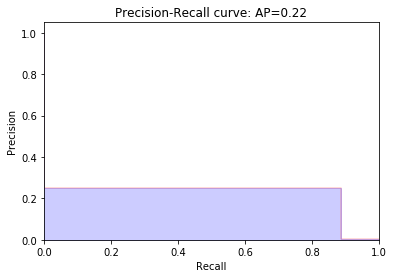

In [28]:
# plot precision-recall score


precision, recall, _ = precision_recall_curve( y_val['Class'].values, y_pred_val)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(
          average))

In [29]:
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve' , linewidth = 2, color= 'darkorange')
    plt.plot([0,1],[0,1], 'k--', linewidth = 2, color ='navy', linestyle='--')
    plt.xlim([0.0,0.001])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

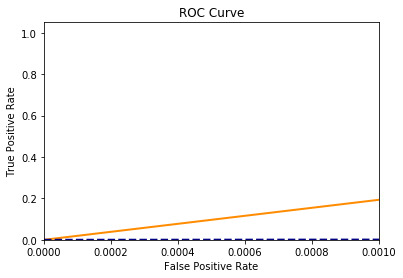

In [30]:
fpr, tpr, t = roc_curve( y_val['Class'].values, y_pred_val)
plot_roc()

# 6. Save Model

In [31]:
x.to_csv("../Results/model_Result_final.csv")

In [32]:
joblib.dump(clf, 'RandomForest (OOB_12 Features - Optimal Parameters).pkl') 

['RandomForest (OOB_12 Features - Optimal Parameters).pkl']